# **PREDICTING STUDENT'S GRADE IN REAL ANALYSIS 1**

## *Exploratory Data Analysis*

In [1]:
# Importing primary dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# Importing Plotly and setting it as the default plotting library
import plotly.express as px

# Setting Plotly as the default plotting library for pandas
pd.options.plotting.backend = "plotly"

In [2]:
df = pd.read_csv('Real_Analysis_1.csv', parse_dates = ['dob'])

In [3]:
df.head()

,Timestamp,matricNo,course,gender,dob,dist,F_edu,M_edu,job,internet,...,higher,to_further,orientation,lecturer,understood_RA,notes,tutorials,assignments,prerequisite,grade
0,9/5/2024 0:50:43,kasu/19/mth/1071,Mathematics,Male,2003-11-03,Far from school (more than 1 Km),Tertiary,Tertiary,No,Yes,...,No,No,Yes,Dr. Lawal Haruna Yusuf,Partially (I understood some parts and crammed...,Yes,7,Yes,C,F
1,9/5/2024 0:52:14,Kasu/19/Mth/1116,Mathematics,Male,2000-11-20,Far from school (more than 1 Km),Tertiary,Tertiary,No,No,...,No,Yes,Yes,Dr. Lawal Haruna Yusuf,Partially (I understood some parts and crammed...,Yes,5,Yes,D,F
2,9/5/2024 0:54:16,Kasu/19/mth/1083,Mathematics,Male,2024-09-05,Far from school (more than 1 Km),Tertiary,Secondary School,Yes,Yes,...,No,Yes,Yes,Dr. Lawal Haruna Yusuf,No Understanding (I crammed everything),Yes,8,Yes,D,F
3,9/5/2024 0:54:41,KASU/19/MTH/1042,Mathematics,Male,1998-10-06,Far from school (more than 1 Km),Tertiary,Tertiary,No,Yes,...,Yes,Yes,Yes,Dr. Lawal Haruna Yusuf,Totally (I understood everything or almost eve...,Yes,10,Yes,A,A
4,9/5/2024 0:55:55,Kasu/19/mth/1117,Mathematics,Male,1999-02-11,Far from school (more than 1 Km),Secondary School,Secondary School,Yes,Yes,...,Yes,Yes,Yes,Dr. Lawal Haruna Yusuf,Partially (I understood some parts and crammed...,Yes,5,Yes,C,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              134 non-null    object        
 1   matricNo               134 non-null    object        
 2   course                 134 non-null    object        
 3   gender                 134 non-null    object        
 4   dob                    134 non-null    datetime64[ns]
 5   dist                   134 non-null    object        
 6   F_edu                  134 non-null    object        
 7   M_edu                  134 non-null    object        
 8   job                    134 non-null    object        
 9   internet               134 non-null    object        
 10  romantic_relationship  134 non-null    object        
 11  go_out                 134 non-null    object        
 12  alcohol                134 non-null    object        
 13  atten

### Checking for outliers in the age

In [5]:
from datetime import datetime as dt

#Creating the Age column
df['age'] = (dt.today() - df.dob).dt.days//365

# Removing outliers
iqr = df['age'].quantile(.75) - df['age'].quantile(.25)
lower = df['age'].quantile(.25) - (3/2)*iqr
upper = df['age'].quantile(.75) + (3/2)*iqr
df[(df['age'] < lower) | (df['age'] > upper)]

,Timestamp,matricNo,course,gender,dob,dist,F_edu,M_edu,job,internet,...,to_further,orientation,lecturer,understood_RA,notes,tutorials,assignments,prerequisite,grade,age
2,9/5/2024 0:54:16,Kasu/19/mth/1083,Mathematics,Male,2024-09-05,Far from school (more than 1 Km),Tertiary,Secondary School,Yes,Yes,...,Yes,Yes,Dr. Lawal Haruna Yusuf,No Understanding (I crammed everything),Yes,8,Yes,D,F,0
72,9/7/2024 13:53:22,Kasu/22/mth/2006,Mathematics,Female,1982-06-05,Far from school (more than 1 Km),Secondary School,Secondary School,No,Yes,...,Yes,Yes,Dr. Lawal Haruna Yusuf,Partially (I understood some parts and crammed...,Yes,10,Yes,C,C,42
84,9/8/2024 23:57:38,Kasu/19/MATH/1041,Mathematics,Female,1920-08-06,Far from school (more than 1 Km),Tertiary,Tertiary,No,Yes,...,Yes,Yes,Dr. Lawal Haruna Yusuf,Partially (I understood some parts and crammed...,Yes,9,No,A,C,104


In [6]:
#Dropping rows age outliers incuding 42. Based on domain knowledge, 42 is a normal outlier but outliers will affect our model especially now that the dataset is having few entries
df = df[~((df['age'] < lower) | (df['age'] > upper))]

In [7]:
df.drop('dob', axis = 1).describe()

,carryovers,tutorials,age
count,131.000000,131.000000,131.000000
mean,0.618321,6.229008,23.297710
std,1.070284,2.794403,3.278589
min,0.000000,0.000000,18.000000
25%,0.000000,5.000000,20.500000
50%,0.000000,7.000000,23.000000
75%,1.000000,8.000000,26.000000
max,5.000000,10.000000,34.000000


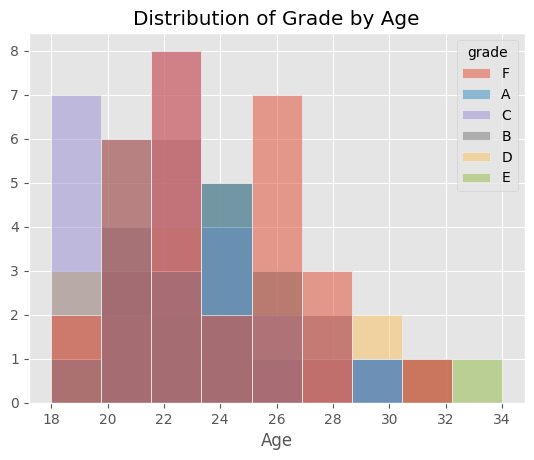

In [8]:
# Histogram
sns.histplot(df, x = 'age', hue = 'grade')
plt.ylabel('')
plt.xlabel('Age')
plt.title('Distribution of Grade by Age')
plt.show()

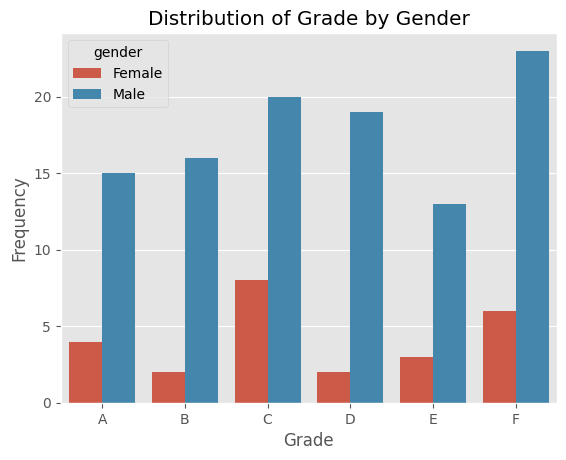

In [9]:
sns.countplot(data = df.sort_values(['grade']), x = 'grade', hue = 'gender')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Distribution of Grade by Gender')
plt.show()

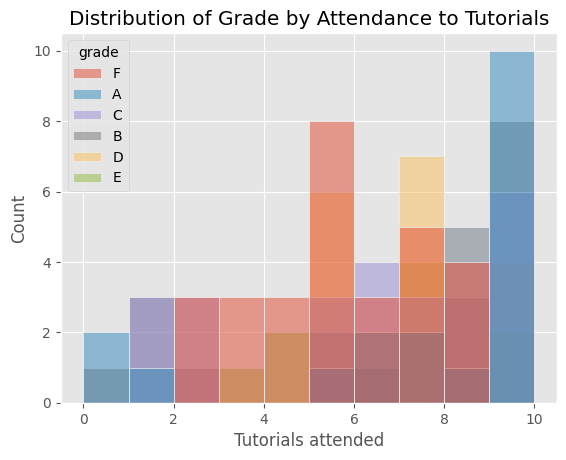

In [10]:
sns.histplot(df, x = 'tutorials', hue = 'grade', bins = 10)
plt.xlabel('Tutorials attended')
plt.title('Distribution of Grade by Attendance to Tutorials')
plt.show()

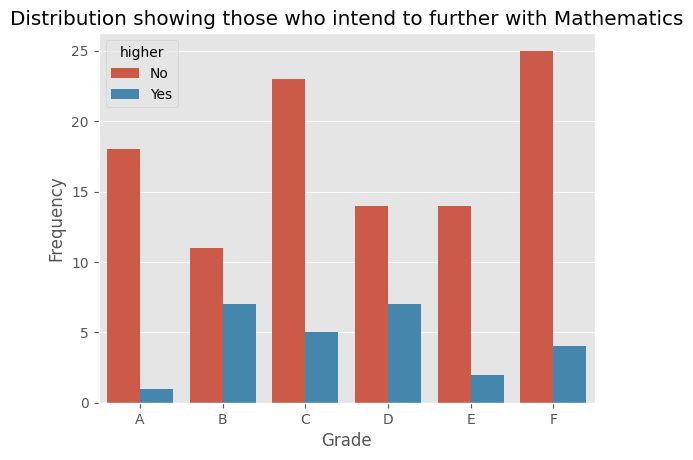

In [11]:
sns.countplot(df.sort_values('grade'), x = 'grade', hue = 'higher')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Distribution showing those who intend to further with Mathematics')
plt.show()

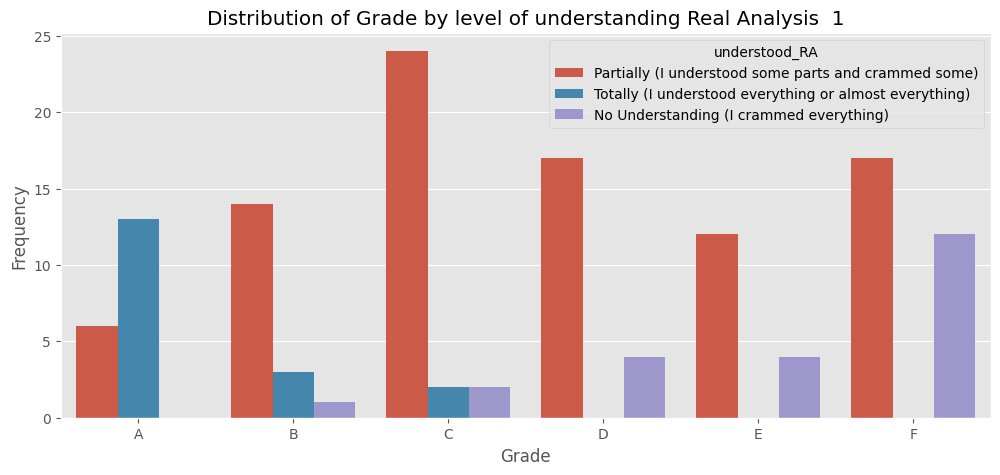

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(df.sort_values(['grade']), x = 'grade', hue = 'understood_RA')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Distribution of Grade by level of understanding Real Analysis  1')
plt.show()

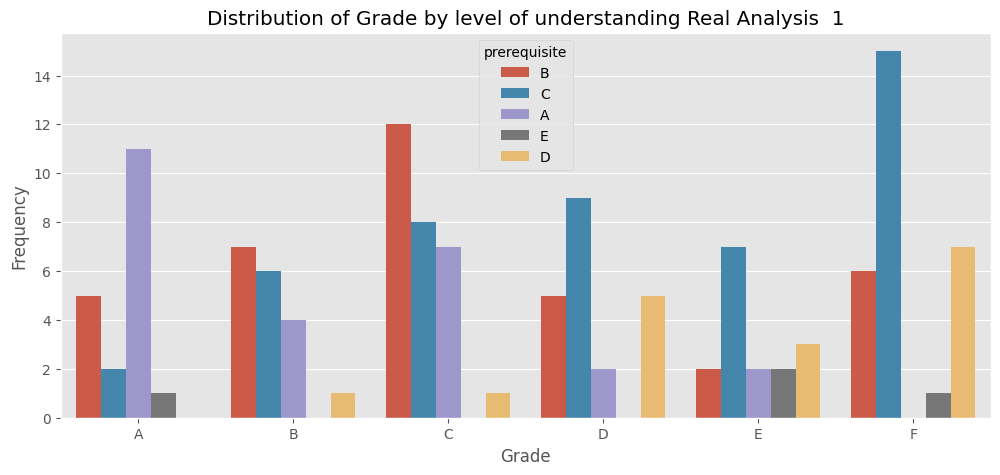

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(df.sort_values(['grade']), x = 'grade', hue = 'prerequisite')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Distribution of Grade by level of understanding Real Analysis  1')
plt.show()

## **Pre-processing**

### *Creating the 'pass' column from the grade column*

In [14]:
df['pass'] = df['grade'].map({
    'F': 0,
    'E': 1,
    'D': 1,
    'C':1,
    'B':1,
    'A':1

})

### *Creating a modified dataset by dropping date of birth and grades columns* 

In [15]:
dataset = df.drop(['dob', 'grade'], axis = 1)

## **Feature Selection**

#### *Splitting dataset into numeric and categorical columns*

In [16]:
numeric_cols = dataset.select_dtypes(include = np.number).columns
cat_cols = dataset.drop(columns = numeric_cols).columns

#### *Selecting numerical columns using t-tests of independence*

In [17]:
from scipy.stats import ttest_ind

def ttest (cols, dataset, y = 'pass'):
    stats = []
    p_values = []

    for col in cols:
        stat, p_value = ttest_ind(dataset[y], dataset[col])
        stats.append(stat)
        p_values.append(p_value)

    return pd.DataFrame({
        'Variable' : cols,
        'Statistic' : stats,
        'P_value' : np.round(p_values,10)
    })


ttest_results = ttest(numeric_cols, dataset)
significant_num_cols = ttest_results[ttest_results['P_value'] <= 0.05]['Variable'].values

In [18]:
ttest_results.sort_values('P_value')

,Variable,Statistic,P_value
1,tutorials,-22.079857,0.000000
2,age,-77.986340,0.000000
0,carryovers,1.597453,0.111379
3,pass,0.000000,1.000000


#### *Selecting Categorical columns using chi-square test of independence*

In [19]:
from scipy.stats import chi2_contingency

def chi2 (cols, dataset, y = 'pass'):
    stats = []
    p_values = []
    
    for col in cols:
        stat, p_value, _, _ = chi2_contingency(pd.crosstab(dataset[y], dataset[col]).values)
        stats.append(stat)
        p_values.append(p_value)
    return pd.DataFrame({
        'Variable' : cols,
        'X - Statistic' : stats,
        'P_value' : np.round(p_values,10)
    })



chi2_results = chi2(cat_cols, dataset)

significant_cat_cols = chi2_results[chi2_results['P_value'] <= 0.05]['Variable'].values

In [20]:
chi2_results.sort_values('P_value', ignore_index = True)

,Variable,X - Statistic,P_value
0,understood_RA,17.707120,0.000143
1,like_course,10.546725,0.001164
2,attendance,15.930485,0.003114
3,prerequisite,14.345579,0.006270
4,punctuality,11.456535,0.021885
5,fam_support,6.591844,0.037034
6,romantic_relationship,4.313454,0.037812
7,like_RA,4.080428,0.043383
8,highschool_math_grade,7.127077,0.067956
9,applied,1.714238,0.190436


In [21]:
X = dataset[list(significant_cat_cols)+list(significant_num_cols)]
y = dataset['pass']

In [22]:
X.head()

,romantic_relationship,attendance,punctuality,fam_support,like_course,like_RA,understood_RA,prerequisite,tutorials,age
0,No,2: Between 60% and 69% of the time,5: Always arrived on time,1: Total support (family covers all educationa...,No,Yes,Partially (I understood some parts and crammed...,C,7,21
1,No,3: Between 50% and 59% of the time,2: Frequently arrived late,2: Partial support (family covers some educati...,No,No,Partially (I understood some parts and crammed...,D,5,24
3,No,1: More than 70% of the time,4: Usually arrived on time,2: Partial support (family covers some educati...,Yes,Yes,Totally (I understood everything or almost eve...,A,10,26
4,Yes,1: More than 70% of the time,4: Usually arrived on time,3: No financial support from family,Yes,Yes,Partially (I understood some parts and crammed...,C,5,25
5,Yes,1: More than 70% of the time,5: Always arrived on time,2: Partial support (family covers some educati...,Yes,Yes,Partially (I understood some parts and crammed...,C,5,22


## *Feature encoding*

In [23]:
X['romantic_relationship'] = X['romantic_relationship'].map({
    'Yes': 1,
    'No': 0
})


X['like_course'] = X['like_course'].map({
    'Yes': 1,
    'No': 0
})

X['like_RA'] = X['like_RA'].map({
    'Yes': 1,
    'No': 0
})


C:\Users\USER\AppData\Local\Temp\ipykernel_8024\541682847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['romantic_relationship'] = X['romantic_relationship'].map({
C:\Users\USER\AppData\Local\Temp\ipykernel_8024\541682847.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['like_course'] = X['like_course'].map({
C:\Users\USER\AppData\Local\Temp\ipykernel_8024\541682847.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [24]:
X['prerequisite'] = X['prerequisite'].map({
    'F': 0,
    'E': 1,
    'D': 2,
    'C':3,
    'B':4,
    'A':5
})

C:\Users\USER\AppData\Local\Temp\ipykernel_8024\2937980170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['prerequisite'] = X['prerequisite'].map({


In [25]:
X['attendance'] = X['attendance'].str[3:].map({
    'Between 60% and 69% of the time': 3,
    'Between 50% and 59% of the time': 2,
    'Between 40% and 49% of the time': 1,
    'More than 70% of the time': 4, 
    'Less than 40% of the time': 0
}).astype(int)

C:\Users\USER\AppData\Local\Temp\ipykernel_8024\1217328189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['attendance'] = X['attendance'].str[3:].map({


In [26]:
X['punctuality'] = X['punctuality'].str[0].astype(int)-1

C:\Users\USER\AppData\Local\Temp\ipykernel_8024\1477987669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['punctuality'] = X['punctuality'].str[0].astype(int)-1


In [27]:
X['fam_support'] = X['fam_support'].str[3:].map({
    'No financial support from family': 0,
    'Partial support (family covers some educational expenses)':1,
    'Total support (family covers all educational expenses)':2
})

C:\Users\USER\AppData\Local\Temp\ipykernel_8024\855625104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['fam_support'] = X['fam_support'].str[3:].map({


In [28]:
X['understood_RA'] = X['understood_RA'].map({
    'Partially (I understood some parts and crammed some)': 1,
    'No Understanding (I crammed everything)':0,
    'Totally (I understood everything or almost everything)':2
})

C:\Users\USER\AppData\Local\Temp\ipykernel_8024\2829799167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['understood_RA'] = X['understood_RA'].map({


In [29]:
X.head()

,romantic_relationship,attendance,punctuality,fam_support,like_course,like_RA,understood_RA,prerequisite,tutorials,age
0,0,3,4,2,0,1,1,3,7,21
1,0,2,1,1,0,0,1,2,5,24
3,0,4,3,1,1,1,2,5,10,26
4,1,4,3,0,1,1,1,3,5,25
5,1,4,4,1,1,1,1,3,5,22


### *Splitting dataset into Train and Test sets*

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 44, stratify = y)

### *Scaling numerical columns*

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[significant_num_cols] = sc.fit_transform(X_train[significant_num_cols])
X_test[significant_num_cols] = sc.transform(X_test[significant_num_cols])

### *Balancing dataset with SMOTE*

In [32]:
y_train.value_counts()

pass
1    81
0    23
Name: count, dtype: int64

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train,y_train)
y_train_resampled.value_counts()

pass
1    81
0    81
Name: count, dtype: int64

## **Modelling**

In [37]:
# Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
#import xgboost as xgb
from sklearn.metrics import accuracy_score as acc

models = {
    'Logistic regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier(random_state = 42),
    'Random Forest' : RandomForestClassifier(random_state = 42),
    'SVC' : SVC(random_state = 42),
    'Gradient Boosting': GradientBoostingClassifier(random_state = 43),
    #'XGBoost' : xgb.XGBClassifier()
}

### **Accuracy on Training Set**

In [38]:
scores = []

for model in models.values():
    model.fit(X_train_resampled, y_train_resampled)  
    y_pred = model.predict(X_train)
    score = acc(y_train, y_pred)*100
    scores.append(score)

results = pd.DataFrame({
    'Model': models.keys(),
    'Score (%)': np.round(scores)})\
    .sort_values('Score (%)', ascending = False, ignore_index = True)

display(results)

,Model,Score (%)
0,Decision Tree,100.0
1,Random Forest,100.0
2,Gradient Boosting,99.0
3,SVC,86.0
4,Logistic regression,83.0
5,KNN,78.0


### **Accuracy on Test Set**

In [39]:
scores = []

for model in models.values():
    y_pred = model.predict(X_test)
    score = acc(y_test, y_pred)*100
    scores.append(score)

results = pd.DataFrame({
    'Model': models.keys(),
    'Score (%)': np.round(scores)})\
    .sort_values('Score (%)', ascending = False, ignore_index = True)

display(results)

,Model,Score (%)
0,Random Forest,96.0
1,Logistic regression,89.0
2,SVC,89.0
3,KNN,85.0
4,Decision Tree,81.0
5,Gradient Boosting,81.0


In [40]:
models.keys()

dict_keys(['Logistic regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVC', 'Gradient Boosting'])

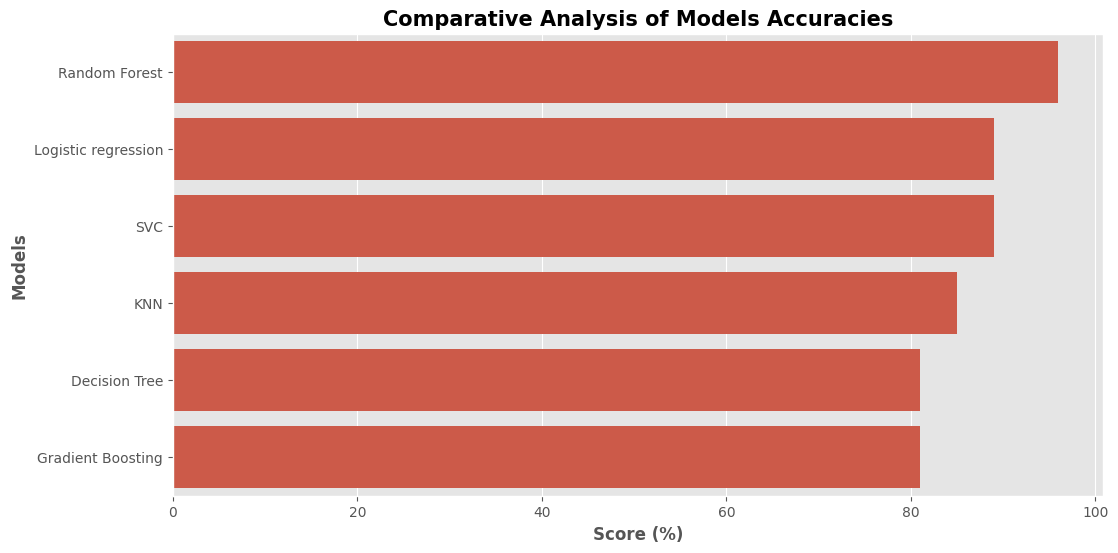

In [41]:
plt.figure(figsize = (12,6))
sns.barplot(results, y = 'Model', x = 'Score (%)')
plt.title('Comparative Analysis of Models Accuracies', fontdict = {'fontweight':'bold', 'fontsize':15})
plt.xlabel('Score (%)', fontdict = {'fontweight':'bold', 'fontsize':12})
plt.ylabel('Models', fontdict = {'fontweight':'bold', 'fontsize':12})
plt.show()

### **Selecting Best Model**

#### *The Random Forest Classifier has the highest accuracy of 96% and so we select it* 

<Axes: >

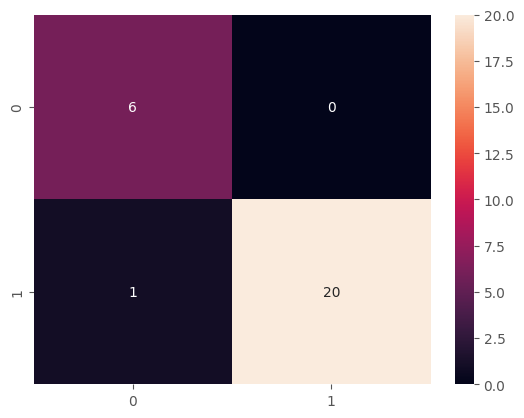

In [42]:
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(random_state = 42)
model.fit(X_train_resampled, y_train_resampled)  
y_pred = model.predict(X_test)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, annot = True)

### **Feature importances**

In [43]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train_resampled, y_train_resampled)  

feature_importances = pd.DataFrame({
    'Features' : X.columns, 
    'Importance' : model.feature_importances_})
feature_importances.sort_values('Importance', ascending = False)

,Features,Importance
7,prerequisite,0.191260
8,tutorials,0.162901
9,age,0.126515
4,like_course,0.119176
1,attendance,0.100082
6,understood_RA,0.090355
3,fam_support,0.072711
0,romantic_relationship,0.060342
2,punctuality,0.042648
5,like_RA,0.034010


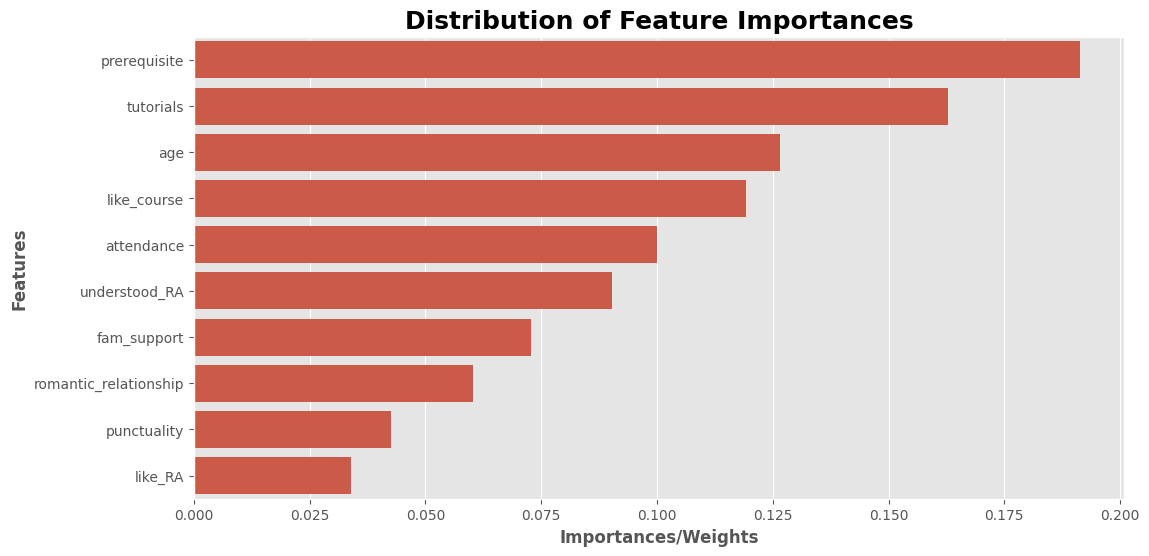

In [44]:
plt.figure(figsize = (12,6))
sns.barplot(data = feature_importances.sort_values('Importance', ascending = False), y = 'Features', x = 'Importance')
plt.title('Distribution of Feature Importances', fontdict = {'fontweight':'bold', 'fontsize':18})
plt.ylabel('Features', fontdict = {'fontweight':'bold', 'fontsize':12})
plt.xlabel('Importances/Weights', fontdict = {'fontweight':'bold', 'fontsize':12})
plt.show()

## **Model Tree Visualization**

In [45]:
from sklearn.tree import export_graphviz
import graphviz

tree = model.estimators_[0]

dot_data = export_graphviz(tree, out_file=None, 
                           feature_names=X_train.columns, 
                           class_names=y_train.astype('str').unique(), 
                           filled=True)

# Render the Graphviz graph
graph = graphviz.Source(dot_data)  
graph.render("random_forest_tree")
graphviz.Source(dot_data)

ModuleNotFoundError: No module named 'graphviz'

## Model Deployment

In [46]:
import pickle

file = open('model.pkl', 'wb')
pickle.dump(model, file)
file.close()

In [17]:
lst = [10000, '1ajd', '2AKJKJ', 5]

for i in range(len(lst)):
    try:
        lst[i] = int(lst[i][0])
    except:
        pass

lst
    

[10000, 1, 2, 5]

In [16]:
for i in 

10000

In [3]:
import streamlit as st 
st.selectbox?

Signature:
st.selectbox(
    label: 'str',
    options: 'OptionSequence[T]',
    index: 'int | None' = 0,
    format_func: 'Callable[[Any], Any]' = <class 'str'>,
    key: 'Key | None' = None,
    help: 'str | None' = None,
    on_change: 'WidgetCallback | None' = None,
    args: 'WidgetArgs | None' = None,
    kwargs: 'WidgetKwargs | None' = None,
    *,
    placeholder: 'str' = 'Choose an option',
    disabled: 'bool' = False,
    label_visibility: 'LabelVisibility' = 'visible',
) -> 'T | None'
Docstring:
Display a select widget.

Parameters
----------
label : str
    A short label explaining to the user what this select widget is for.
    The label can optionally contain GitHub-flavored Markdown of the
    following types: Bold, Italics, Strikethroughs, Inline Code, Links,
    and Images. Images display like icons, with a max height equal to
    the font height.

    Unsupported Markdown elements are unwrapped so only their children
    (text contents) render. Display unsupported el

In [18]:
sorted(['0. No', '1. Yes'])

['0. No', '1. Yes']